# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

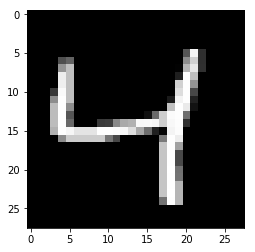

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [18]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 128 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, 784))
targets_ = tf.placeholder(tf.float32, shape=(None, 784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [19]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [20]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6944
Epoch: 1/20... Training loss: 0.6821
Epoch: 1/20... Training loss: 0.6696
Epoch: 1/20... Training loss: 0.6549
Epoch: 1/20... Training loss: 0.6369
Epoch: 1/20... Training loss: 0.6178
Epoch: 1/20... Training loss: 0.5936
Epoch: 1/20... Training loss: 0.5657
Epoch: 1/20... Training loss: 0.5382
Epoch: 1/20... Training loss: 0.5133
Epoch: 1/20... Training loss: 0.4806
Epoch: 1/20... Training loss: 0.4480
Epoch: 1/20... Training loss: 0.4180
Epoch: 1/20... Training loss: 0.3974
Epoch: 1/20... Training loss: 0.3801
Epoch: 1/20... Training loss: 0.3524
Epoch: 1/20... Training loss: 0.3442
Epoch: 1/20... Training loss: 0.3333
Epoch: 1/20... Training loss: 0.3194
Epoch: 1/20... Training loss: 0.3097
Epoch: 1/20... Training loss: 0.3006
Epoch: 1/20... Training loss: 0.3014
Epoch: 1/20... Training loss: 0.3036
Epoch: 1/20... Training loss: 0.2858
Epoch: 1/20... Training loss: 0.2935
Epoch: 1/20... Training loss: 0.2886
Epoch: 1/20... Training loss: 0.2774
E

Epoch: 1/20... Training loss: 0.1388
Epoch: 1/20... Training loss: 0.1412
Epoch: 1/20... Training loss: 0.1340
Epoch: 1/20... Training loss: 0.1372
Epoch: 1/20... Training loss: 0.1349
Epoch: 1/20... Training loss: 0.1377
Epoch: 1/20... Training loss: 0.1336
Epoch: 1/20... Training loss: 0.1370
Epoch: 1/20... Training loss: 0.1340
Epoch: 1/20... Training loss: 0.1343
Epoch: 1/20... Training loss: 0.1378
Epoch: 1/20... Training loss: 0.1350
Epoch: 1/20... Training loss: 0.1346
Epoch: 1/20... Training loss: 0.1309
Epoch: 1/20... Training loss: 0.1299
Epoch: 1/20... Training loss: 0.1297
Epoch: 1/20... Training loss: 0.1288
Epoch: 1/20... Training loss: 0.1374
Epoch: 1/20... Training loss: 0.1365
Epoch: 1/20... Training loss: 0.1376
Epoch: 1/20... Training loss: 0.1292
Epoch: 1/20... Training loss: 0.1311
Epoch: 1/20... Training loss: 0.1312
Epoch: 1/20... Training loss: 0.1314
Epoch: 1/20... Training loss: 0.1310
Epoch: 1/20... Training loss: 0.1309
Epoch: 1/20... Training loss: 0.1345
E

Epoch: 2/20... Training loss: 0.1047
Epoch: 2/20... Training loss: 0.1049
Epoch: 2/20... Training loss: 0.1053
Epoch: 2/20... Training loss: 0.1032
Epoch: 2/20... Training loss: 0.1048
Epoch: 2/20... Training loss: 0.1051
Epoch: 2/20... Training loss: 0.1005
Epoch: 2/20... Training loss: 0.1015
Epoch: 2/20... Training loss: 0.1054
Epoch: 2/20... Training loss: 0.1071
Epoch: 2/20... Training loss: 0.1038
Epoch: 2/20... Training loss: 0.1015
Epoch: 2/20... Training loss: 0.1020
Epoch: 2/20... Training loss: 0.1070
Epoch: 2/20... Training loss: 0.1033
Epoch: 2/20... Training loss: 0.1027
Epoch: 2/20... Training loss: 0.1024
Epoch: 2/20... Training loss: 0.1036
Epoch: 2/20... Training loss: 0.1048
Epoch: 2/20... Training loss: 0.1028
Epoch: 2/20... Training loss: 0.1018
Epoch: 2/20... Training loss: 0.0996
Epoch: 2/20... Training loss: 0.1053
Epoch: 2/20... Training loss: 0.1021
Epoch: 2/20... Training loss: 0.0992
Epoch: 2/20... Training loss: 0.1031
Epoch: 2/20... Training loss: 0.1001
E

Epoch: 3/20... Training loss: 0.0908
Epoch: 3/20... Training loss: 0.0903
Epoch: 3/20... Training loss: 0.0897
Epoch: 3/20... Training loss: 0.0887
Epoch: 3/20... Training loss: 0.0904
Epoch: 3/20... Training loss: 0.0911
Epoch: 3/20... Training loss: 0.0918
Epoch: 3/20... Training loss: 0.0913
Epoch: 3/20... Training loss: 0.0890
Epoch: 3/20... Training loss: 0.0900
Epoch: 3/20... Training loss: 0.0889
Epoch: 3/20... Training loss: 0.0893
Epoch: 3/20... Training loss: 0.0885
Epoch: 3/20... Training loss: 0.0902
Epoch: 3/20... Training loss: 0.0921
Epoch: 3/20... Training loss: 0.0906
Epoch: 3/20... Training loss: 0.0921
Epoch: 3/20... Training loss: 0.0861
Epoch: 3/20... Training loss: 0.0896
Epoch: 3/20... Training loss: 0.0883
Epoch: 3/20... Training loss: 0.0899
Epoch: 3/20... Training loss: 0.0909
Epoch: 3/20... Training loss: 0.0885
Epoch: 3/20... Training loss: 0.0901
Epoch: 3/20... Training loss: 0.0932
Epoch: 3/20... Training loss: 0.0904
Epoch: 3/20... Training loss: 0.0901
E

Epoch: 4/20... Training loss: 0.0832
Epoch: 4/20... Training loss: 0.0862
Epoch: 4/20... Training loss: 0.0859
Epoch: 4/20... Training loss: 0.0845
Epoch: 4/20... Training loss: 0.0835
Epoch: 4/20... Training loss: 0.0825
Epoch: 4/20... Training loss: 0.0844
Epoch: 4/20... Training loss: 0.0839
Epoch: 4/20... Training loss: 0.0827
Epoch: 4/20... Training loss: 0.0819
Epoch: 4/20... Training loss: 0.0826
Epoch: 4/20... Training loss: 0.0834
Epoch: 4/20... Training loss: 0.0841
Epoch: 4/20... Training loss: 0.0841
Epoch: 4/20... Training loss: 0.0841
Epoch: 4/20... Training loss: 0.0839
Epoch: 4/20... Training loss: 0.0833
Epoch: 4/20... Training loss: 0.0852
Epoch: 4/20... Training loss: 0.0850
Epoch: 4/20... Training loss: 0.0830
Epoch: 4/20... Training loss: 0.0845
Epoch: 4/20... Training loss: 0.0837
Epoch: 4/20... Training loss: 0.0817
Epoch: 4/20... Training loss: 0.0813
Epoch: 4/20... Training loss: 0.0841
Epoch: 4/20... Training loss: 0.0840
Epoch: 4/20... Training loss: 0.0828
E

Epoch: 4/20... Training loss: 0.0777
Epoch: 4/20... Training loss: 0.0775
Epoch: 4/20... Training loss: 0.0803
Epoch: 4/20... Training loss: 0.0775
Epoch: 4/20... Training loss: 0.0798
Epoch: 4/20... Training loss: 0.0777
Epoch: 4/20... Training loss: 0.0802
Epoch: 4/20... Training loss: 0.0788
Epoch: 4/20... Training loss: 0.0765
Epoch: 4/20... Training loss: 0.0777
Epoch: 4/20... Training loss: 0.0800
Epoch: 4/20... Training loss: 0.0776
Epoch: 4/20... Training loss: 0.0755
Epoch: 4/20... Training loss: 0.0787
Epoch: 4/20... Training loss: 0.0753
Epoch: 4/20... Training loss: 0.0783
Epoch: 4/20... Training loss: 0.0790
Epoch: 4/20... Training loss: 0.0782
Epoch: 4/20... Training loss: 0.0798
Epoch: 4/20... Training loss: 0.0797
Epoch: 4/20... Training loss: 0.0771
Epoch: 4/20... Training loss: 0.0793
Epoch: 4/20... Training loss: 0.0776
Epoch: 4/20... Training loss: 0.0795
Epoch: 4/20... Training loss: 0.0790
Epoch: 4/20... Training loss: 0.0782
Epoch: 4/20... Training loss: 0.0765
E

Epoch: 5/20... Training loss: 0.0758
Epoch: 5/20... Training loss: 0.0722
Epoch: 5/20... Training loss: 0.0756
Epoch: 5/20... Training loss: 0.0764
Epoch: 5/20... Training loss: 0.0764
Epoch: 5/20... Training loss: 0.0771
Epoch: 5/20... Training loss: 0.0767
Epoch: 5/20... Training loss: 0.0764
Epoch: 5/20... Training loss: 0.0747
Epoch: 5/20... Training loss: 0.0746
Epoch: 5/20... Training loss: 0.0749
Epoch: 5/20... Training loss: 0.0763
Epoch: 5/20... Training loss: 0.0776
Epoch: 5/20... Training loss: 0.0765
Epoch: 5/20... Training loss: 0.0742
Epoch: 5/20... Training loss: 0.0763
Epoch: 5/20... Training loss: 0.0759
Epoch: 5/20... Training loss: 0.0762
Epoch: 5/20... Training loss: 0.0756
Epoch: 5/20... Training loss: 0.0749
Epoch: 5/20... Training loss: 0.0759
Epoch: 5/20... Training loss: 0.0760
Epoch: 5/20... Training loss: 0.0738
Epoch: 5/20... Training loss: 0.0771
Epoch: 5/20... Training loss: 0.0746
Epoch: 5/20... Training loss: 0.0743
Epoch: 5/20... Training loss: 0.0749
E

Epoch: 6/20... Training loss: 0.0735
Epoch: 6/20... Training loss: 0.0753
Epoch: 6/20... Training loss: 0.0755
Epoch: 6/20... Training loss: 0.0728
Epoch: 6/20... Training loss: 0.0755
Epoch: 6/20... Training loss: 0.0751
Epoch: 6/20... Training loss: 0.0759
Epoch: 6/20... Training loss: 0.0726
Epoch: 6/20... Training loss: 0.0743
Epoch: 6/20... Training loss: 0.0712
Epoch: 6/20... Training loss: 0.0711
Epoch: 6/20... Training loss: 0.0732
Epoch: 6/20... Training loss: 0.0727
Epoch: 6/20... Training loss: 0.0760
Epoch: 6/20... Training loss: 0.0718
Epoch: 6/20... Training loss: 0.0718
Epoch: 6/20... Training loss: 0.0717
Epoch: 6/20... Training loss: 0.0736
Epoch: 6/20... Training loss: 0.0748
Epoch: 6/20... Training loss: 0.0752
Epoch: 6/20... Training loss: 0.0750
Epoch: 6/20... Training loss: 0.0729
Epoch: 6/20... Training loss: 0.0734
Epoch: 6/20... Training loss: 0.0727
Epoch: 6/20... Training loss: 0.0725
Epoch: 6/20... Training loss: 0.0721
Epoch: 6/20... Training loss: 0.0746
E

Epoch: 7/20... Training loss: 0.0718
Epoch: 7/20... Training loss: 0.0736
Epoch: 7/20... Training loss: 0.0708
Epoch: 7/20... Training loss: 0.0709
Epoch: 7/20... Training loss: 0.0737
Epoch: 7/20... Training loss: 0.0733
Epoch: 7/20... Training loss: 0.0737
Epoch: 7/20... Training loss: 0.0728
Epoch: 7/20... Training loss: 0.0701
Epoch: 7/20... Training loss: 0.0712
Epoch: 7/20... Training loss: 0.0707
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0702
Epoch: 7/20... Training loss: 0.0727
Epoch: 7/20... Training loss: 0.0727
Epoch: 7/20... Training loss: 0.0719
Epoch: 7/20... Training loss: 0.0720
Epoch: 7/20... Training loss: 0.0722
Epoch: 7/20... Training loss: 0.0727
Epoch: 7/20... Training loss: 0.0726
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0718
Epoch: 7/20... Training loss: 0.0712
Epoch: 7/20... Training loss: 0.0736
Epoch: 7/20... Training loss: 0.0723
Epoch: 7/20... Training loss: 0.0721
Epoch: 7/20... Training loss: 0.0708
E

Epoch: 7/20... Training loss: 0.0726
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0736
Epoch: 7/20... Training loss: 0.0714
Epoch: 7/20... Training loss: 0.0708
Epoch: 7/20... Training loss: 0.0698
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0736
Epoch: 7/20... Training loss: 0.0715
Epoch: 7/20... Training loss: 0.0679
Epoch: 8/20... Training loss: 0.0693
Epoch: 8/20... Training loss: 0.0704
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0693
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0700
Epoch: 8/20... Training loss: 0.0709
Epoch: 8/20... Training loss: 0.0720
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0696
Epoch: 8/20... Training loss: 0.0713
Epoch: 8/20... Training loss: 0.0719
Epoch: 8/20... Training loss: 0.0717
Epoch: 8/20... Training loss: 0.0713
Epoch: 8/20... Training loss: 0.0720
Epoch: 8/20... Training loss: 0.0719
E

Epoch: 8/20... Training loss: 0.0716
Epoch: 8/20... Training loss: 0.0725
Epoch: 8/20... Training loss: 0.0682
Epoch: 8/20... Training loss: 0.0678
Epoch: 8/20... Training loss: 0.0709
Epoch: 8/20... Training loss: 0.0712
Epoch: 8/20... Training loss: 0.0691
Epoch: 8/20... Training loss: 0.0704
Epoch: 8/20... Training loss: 0.0692
Epoch: 8/20... Training loss: 0.0723
Epoch: 8/20... Training loss: 0.0680
Epoch: 8/20... Training loss: 0.0701
Epoch: 8/20... Training loss: 0.0715
Epoch: 8/20... Training loss: 0.0725
Epoch: 8/20... Training loss: 0.0718
Epoch: 8/20... Training loss: 0.0705
Epoch: 8/20... Training loss: 0.0705
Epoch: 8/20... Training loss: 0.0708
Epoch: 8/20... Training loss: 0.0716
Epoch: 8/20... Training loss: 0.0695
Epoch: 8/20... Training loss: 0.0720
Epoch: 8/20... Training loss: 0.0691
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0673
Epoch: 8/20... Training loss: 0.0701
Epoch: 8/20... Training loss: 0.0682
Epoch: 8/20... Training loss: 0.0701
E

Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0696
Epoch: 9/20... Training loss: 0.0681
Epoch: 9/20... Training loss: 0.0696
Epoch: 9/20... Training loss: 0.0696
Epoch: 9/20... Training loss: 0.0706
Epoch: 9/20... Training loss: 0.0684
Epoch: 9/20... Training loss: 0.0674
Epoch: 9/20... Training loss: 0.0710
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0690
Epoch: 9/20... Training loss: 0.0693
Epoch: 9/20... Training loss: 0.0696
Epoch: 9/20... Training loss: 0.0698
Epoch: 9/20... Training loss: 0.0698
Epoch: 9/20... Training loss: 0.0692
Epoch: 9/20... Training loss: 0.0701
Epoch: 9/20... Training loss: 0.0716
Epoch: 9/20... Training loss: 0.0679
Epoch: 9/20... Training loss: 0.0686
Epoch: 9/20... Training loss: 0.0701
Epoch: 9/20... Training loss: 0.0711
Epoch: 9/20... Training loss: 0.0714
Epoch: 9/20... Training loss: 0.0677
Epoch: 9/20... Training loss: 0.0713
Epoch: 9/20... Training loss: 0.0672
Epoch: 9/20... Training loss: 0.0706
E

Epoch: 10/20... Training loss: 0.0673
Epoch: 10/20... Training loss: 0.0689
Epoch: 10/20... Training loss: 0.0697
Epoch: 10/20... Training loss: 0.0685
Epoch: 10/20... Training loss: 0.0653
Epoch: 10/20... Training loss: 0.0705
Epoch: 10/20... Training loss: 0.0660
Epoch: 10/20... Training loss: 0.0697
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0689
Epoch: 10/20... Training loss: 0.0680
Epoch: 10/20... Training loss: 0.0690
Epoch: 10/20... Training loss: 0.0706
Epoch: 10/20... Training loss: 0.0702
Epoch: 10/20... Training loss: 0.0683
Epoch: 10/20... Training loss: 0.0691
Epoch: 10/20... Training loss: 0.0684
Epoch: 10/20... Training loss: 0.0696
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20... Training loss: 0.0707
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20... Training loss: 0.0705
Epoch: 10/20... Training loss: 0.0682
Epoch: 10/20... Training loss: 0.0678
Epoch: 10/20... Training loss: 0.0700
Epoch: 10/20... Training loss: 0.0691
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0695
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0689
Epoch: 11/20... Training loss: 0.0691
Epoch: 11/20... Training loss: 0.0677
Epoch: 11/20... Training loss: 0.0688
Epoch: 11/20... Training loss: 0.0681
Epoch: 11/20... Training loss: 0.0692
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0700
Epoch: 11/20... Training loss: 0.0695
Epoch: 11/20... Training loss: 0.0703
Epoch: 11/20... Training loss: 0.0672
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0683
Epoch: 11/20... Training loss: 0.0678
Epoch: 11/20... Training loss: 0.0677
Epoch: 11/20... Training loss: 0.0684
Epoch: 11/20... Training loss: 0.0679
Epoch: 11/20... Training loss: 0.0688
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0704
Epoch: 11/20... Training loss: 0.0668
Epoch: 11/20... Training loss: 0.0696
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0689
Epoch: 11/20... Training loss: 0.0694
Epoch: 11/20... Training loss: 0.0665
Epoch: 11/20... Training loss: 0.0699
Epoch: 11/20... Training loss: 0.0692
Epoch: 11/20... Training loss: 0.0673
Epoch: 11/20... Training loss: 0.0694
Epoch: 11/20... Training loss: 0.0682
Epoch: 11/20... Training loss: 0.0658
Epoch: 11/20... Training loss: 0.0694
Epoch: 11/20... Training loss: 0.0680
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0678
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0683
Epoch: 11/20... Training loss: 0.0691
Epoch: 11/20... Training loss: 0.0701
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0701
Epoch: 11/20... Training loss: 0.0689
Epoch: 11/20... Training loss: 0.0705
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0681
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0681
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0665
Epoch: 12/20... Training loss: 0.0676
Epoch: 12/20... Training loss: 0.0679
Epoch: 12/20... Training loss: 0.0676
Epoch: 12/20... Training loss: 0.0665
Epoch: 12/20... Training loss: 0.0674
Epoch: 12/20... Training loss: 0.0679
Epoch: 12/20... Training loss: 0.0691
Epoch: 12/20... Training loss: 0.0678
Epoch: 12/20... Training loss: 0.0693
Epoch: 12/20... Training loss: 0.0681
Epoch: 12/20... Training loss: 0.0653
Epoch: 12/20... Training loss: 0.0689
Epoch: 12/20... Training loss: 0.0679
Epoch: 12/20... Training loss: 0.0678
Epoch: 12/20... Training loss: 0.0704
Epoch: 12/20... Training loss: 0.0668
Epoch: 12/20... Training loss: 0.0679
Epoch: 12/20... Training loss: 0.0687
Epoch: 12/20... Training loss: 0.0659
Epoch: 12/20... Training loss: 0.0680
Epoch: 12/20... Training loss: 0.0658
Epoch: 12/20... Training loss: 0.0670
Epoch: 12/20... Training loss: 0.0679
Epoch: 12/20... Training loss: 0.0673
Epoch: 12/20... Training loss: 0.0677
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0665
Epoch: 13/20... Training loss: 0.0654
Epoch: 13/20... Training loss: 0.0694
Epoch: 13/20... Training loss: 0.0677
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0654
Epoch: 13/20... Training loss: 0.0663
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0667
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0676
Epoch: 13/20... Training loss: 0.0694
Epoch: 13/20... Training loss: 0.0666
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0679
Epoch: 13/20... Training loss: 0.0681
Epoch: 13/20... Training loss: 0.0665
Epoch: 13/20... Training loss: 0.0687
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0686
Epoch: 13/20... Training loss: 0.0698
Epoch: 13/20... Training loss: 0.0678
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0687
Epoch: 13/20... Training loss: 0.0665
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0658
Epoch: 13/20... Training loss: 0.0689
Epoch: 13/20... Training loss: 0.0669
Epoch: 13/20... Training loss: 0.0672
Epoch: 13/20... Training loss: 0.0676
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0673
Epoch: 13/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0670
Epoch: 14/20... Training loss: 0.0685
Epoch: 14/20... Training loss: 0.0660
Epoch: 14/20... Training loss: 0.0655
Epoch: 14/20... Training loss: 0.0685
Epoch: 14/20... Training loss: 0.0673
Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0669
Epoch: 14/20... Training loss: 0.0677
Epoch: 14/20... Training loss: 0.0668
Epoch: 14/20... Training loss: 0.0682
Epoch: 14/20... Training loss: 0.0688
Epoch: 14/20... Training loss: 0.0693
Epoch: 14/20... Training loss: 0.0682
Epoch: 14/20... Training loss: 0.0679
Epoch: 14/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0662
Epoch: 14/20... Training loss: 0.0695
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0641
Epoch: 14/20... Training loss: 0.0683
Epoch: 14/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0679
Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0665
Epoch: 14/20... Training loss: 0.0686
Epoch: 14/20... Training loss: 0.0689
Epoch: 14/20... Training loss: 0.0663
Epoch: 14/20... Training loss: 0.0692
Epoch: 14/20... Training loss: 0.0663
Epoch: 14/20... Training loss: 0.0692
Epoch: 14/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0673
Epoch: 14/20... Training loss: 0.0690
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0672
Epoch: 14/20... Training loss: 0.0685
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0657
Epoch: 14/20... Training loss: 0.0647
Epoch: 14/20... Training loss: 0.0662
Epoch: 14/20... Training loss: 0.0664
Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0691
Epoch: 14/20... Training loss: 0.0671
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0665
Epoch: 15/20... Training loss: 0.0684
Epoch: 15/20... Training loss: 0.0679
Epoch: 15/20... Training loss: 0.0668
Epoch: 15/20... Training loss: 0.0683
Epoch: 15/20... Training loss: 0.0673
Epoch: 15/20... Training loss: 0.0685
Epoch: 15/20... Training loss: 0.0694
Epoch: 15/20... Training loss: 0.0668
Epoch: 15/20... Training loss: 0.0668
Epoch: 15/20... Training loss: 0.0683
Epoch: 15/20... Training loss: 0.0673
Epoch: 15/20... Training loss: 0.0689
Epoch: 15/20... Training loss: 0.0674
Epoch: 15/20... Training loss: 0.0687
Epoch: 15/20... Training loss: 0.0666
Epoch: 15/20... Training loss: 0.0683
Epoch: 15/20... Training loss: 0.0663
Epoch: 15/20... Training loss: 0.0673
Epoch: 15/20... Training loss: 0.0659
Epoch: 15/20... Training loss: 0.0674
Epoch: 15/20... Training loss: 0.0676
Epoch: 15/20... Training loss: 0.0671
Epoch: 15/20... Training loss: 0.0660
Epoch: 15/20... Training loss: 0.0658
Epoch: 15/20... Training loss: 0.0677
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0668
Epoch: 16/20... Training loss: 0.0684
Epoch: 16/20... Training loss: 0.0680
Epoch: 16/20... Training loss: 0.0675
Epoch: 16/20... Training loss: 0.0664
Epoch: 16/20... Training loss: 0.0687
Epoch: 16/20... Training loss: 0.0666
Epoch: 16/20... Training loss: 0.0662
Epoch: 16/20... Training loss: 0.0678
Epoch: 16/20... Training loss: 0.0661
Epoch: 16/20... Training loss: 0.0670
Epoch: 16/20... Training loss: 0.0668
Epoch: 16/20... Training loss: 0.0662
Epoch: 16/20... Training loss: 0.0673
Epoch: 16/20... Training loss: 0.0669
Epoch: 16/20... Training loss: 0.0692
Epoch: 16/20... Training loss: 0.0684
Epoch: 16/20... Training loss: 0.0664
Epoch: 16/20... Training loss: 0.0674
Epoch: 16/20... Training loss: 0.0680
Epoch: 16/20... Training loss: 0.0657
Epoch: 16/20... Training loss: 0.0661
Epoch: 16/20... Training loss: 0.0667
Epoch: 16/20... Training loss: 0.0679
Epoch: 16/20... Training loss: 0.0667
Epoch: 16/20... Training loss: 0.0677
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0676
Epoch: 17/20... Training loss: 0.0689
Epoch: 17/20... Training loss: 0.0686
Epoch: 17/20... Training loss: 0.0655
Epoch: 17/20... Training loss: 0.0663
Epoch: 17/20... Training loss: 0.0664
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0665
Epoch: 17/20... Training loss: 0.0661
Epoch: 17/20... Training loss: 0.0661
Epoch: 17/20... Training loss: 0.0653
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20... Training loss: 0.0654
Epoch: 17/20... Training loss: 0.0659
Epoch: 17/20... Training loss: 0.0675
Epoch: 17/20... Training loss: 0.0665
Epoch: 17/20... Training loss: 0.0673
Epoch: 17/20... Training loss: 0.0653
Epoch: 17/20... Training loss: 0.0669
Epoch: 17/20... Training loss: 0.0674
Epoch: 17/20... Training loss: 0.0659
Epoch: 17/20... Training loss: 0.0680
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0657
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0666
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0657
Epoch: 17/20... Training loss: 0.0674
Epoch: 17/20... Training loss: 0.0654
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0660
Epoch: 17/20... Training loss: 0.0661
Epoch: 17/20... Training loss: 0.0665
Epoch: 17/20... Training loss: 0.0653
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0678
Epoch: 17/20... Training loss: 0.0669
Epoch: 17/20... Training loss: 0.0663
Epoch: 17/20... Training loss: 0.0685
Epoch: 17/20... Training loss: 0.0667
Epoch: 17/20... Training loss: 0.0666
Epoch: 17/20... Training loss: 0.0672
Epoch: 17/20... Training loss: 0.0657
Epoch: 17/20... Training loss: 0.0688
Epoch: 17/20... Training loss: 0.0659
Epoch: 17/20... Training loss: 0.0683
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0679
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0657
Epoch: 18/20... Training loss: 0.0661
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0684
Epoch: 18/20... Training loss: 0.0693
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0672
Epoch: 18/20... Training loss: 0.0672
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0679
Epoch: 18/20... Training loss: 0.0679
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0669
Epoch: 18/20... Training loss: 0.0693
Epoch: 18/20... Training loss: 0.0651
Epoch: 18/20... Training loss: 0.0649
Epoch: 18/20... Training loss: 0.0646
Epoch: 18/20... Training loss: 0.0662
Epoch: 18/20... Training loss: 0.0657
Epoch: 18/20... Training loss: 0.0661
Epoch: 18/20... Training loss: 0.0661
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0673
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0676
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0648
Epoch: 19/20... Training loss: 0.0656
Epoch: 19/20... Training loss: 0.0650
Epoch: 19/20... Training loss: 0.0658
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0652
Epoch: 19/20... Training loss: 0.0663
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0664
Epoch: 19/20... Training loss: 0.0687
Epoch: 19/20... Training loss: 0.0641
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0677
Epoch: 19/20... Training loss: 0.0655
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0656
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0663
Epoch: 19/20... Training loss: 0.0669
Epoch: 19/20... Training loss: 0.0663
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0687
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0662
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0677
Epoch: 20/20... Training loss: 0.0655
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0658
Epoch: 20/20... Training loss: 0.0640
Epoch: 20/20... Training loss: 0.0662
Epoch: 20/20... Training loss: 0.0674
Epoch: 20/20... Training loss: 0.0664
Epoch: 20/20... Training loss: 0.0654
Epoch: 20/20... Training loss: 0.0653
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0669
Epoch: 20/20... Training loss: 0.0662
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0689
Epoch: 20/20... Training loss: 0.0657
Epoch: 20/20... Training loss: 0.0677
Epoch: 20/20... Training loss: 0.0657
Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0658
Epoch: 20/20... Training loss: 0.0662
Epoch: 20/20... Training loss: 0.0684
Epoch: 20/20... Training loss: 0.0669
Epoch: 20/20... Training loss: 0.0666
Epoch: 20/20... Training loss: 0.0665
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0680


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

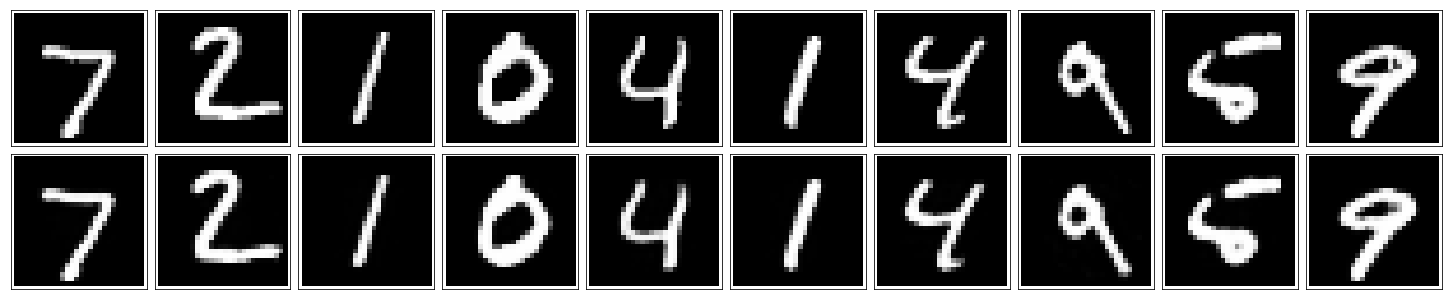

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [22]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.